<a href="https://colab.research.google.com/github/g-tumwesigye/FitPredictor_Model/blob/main/FitPredictor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FITPREDICTOR NEURAL NETWORK DIAGRAM**

Saving FitPredictor_Neural_Network_diagram.png to FitPredictor_Neural_Network_diagram (2).png


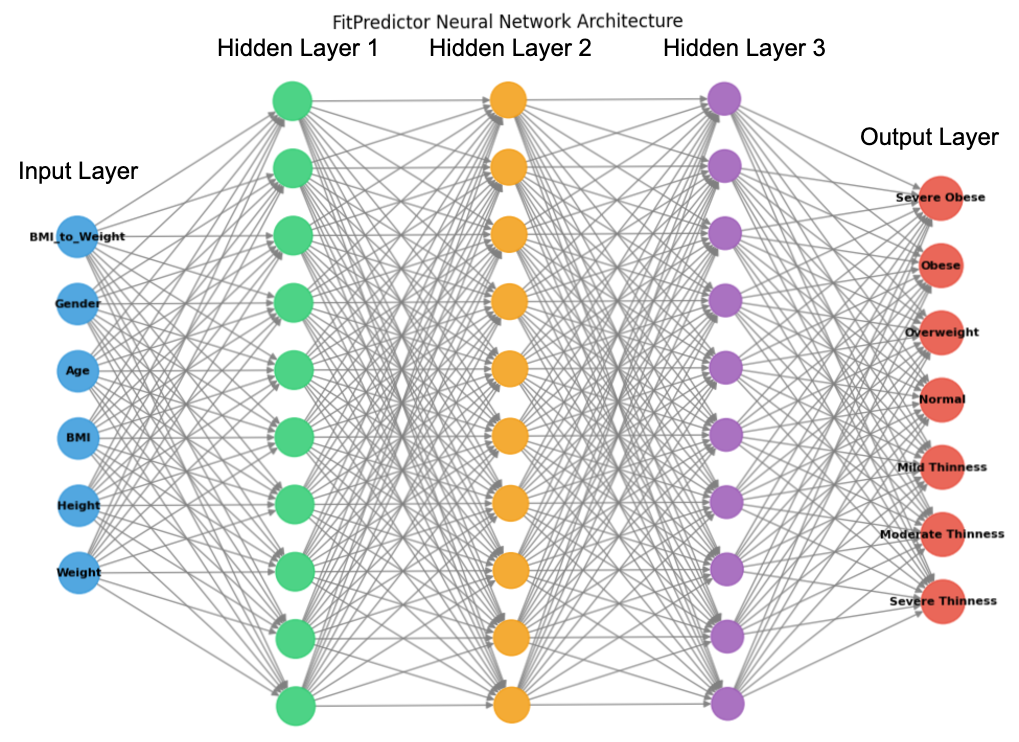

In [4]:
from google.colab import files

# Uploading the diagram
uploaded = files.upload()

from IPython.display import display, Image

# Displaying the diagram
display(Image("FitPredictor_Neural_Network_diagram.png"))



**IMPORTING LIBRARIES**

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, AdamW, RMSprop, SGD, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import os
import joblib
print("All the required libraries have been imported!")

All the required libraries have been imported!


**DATASET LOADING**

In [6]:
data = pd.read_csv("/content/fitpredictor_dataset.csv")

# Displaying the first few rows
print("First 5 rows of the dataset:")
display(data.head())

# Show the number of rows & columns
print(f"\n Dataset shape: {data.shape}")


First 5 rows of the dataset:


,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,Acceptable,Male,29,normal,4
1,77.721154,1.945498,20.534184,13.731021,Fitness,Male,23,normal,4
2,87.558726,1.742754,28.828859,42.304631,Obese,Female,57,over weight,5
3,89.473356,1.758318,28.940017,27.958021,Obese,Male,41,over weight,5
4,69.963943,1.722570,23.578732,16.464478,Fitness,Male,19,normal,4



 Dataset shape: (5000, 9)


**DATA PREPROCESSING & VISUALIZATION**


 Checking for missing values:
Weight                          0
Height                          0
BMI                             0
Body Fat Percentage             0
BFPcase                         0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64

 THE HEATMAP:


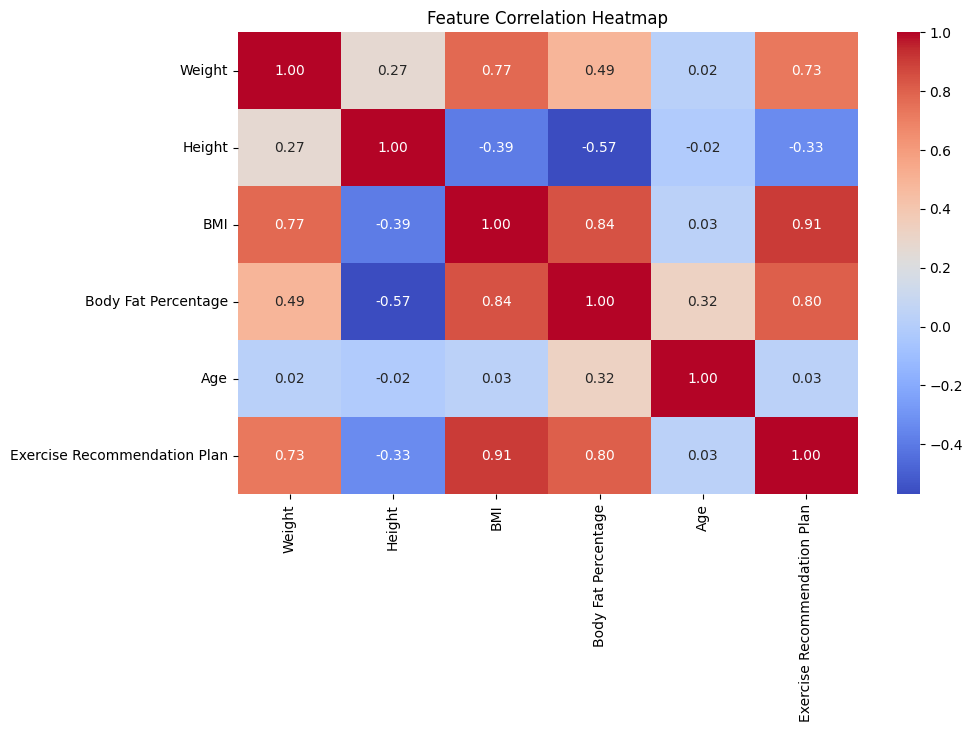

In [7]:
# Checking for missing values
print("\n Checking for missing values:")
print(data.isnull().sum())


# Heatmap
print("\n THE HEATMAP:")
plt.figure(figsize=(10,6))
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**FEATURE ENGINEERING**

In [8]:
# Drop highly correlated features
data.drop(columns=["Body Fat Percentage", "BFPcase", "Exercise Recommendation Plan"], inplace=True)

# Creating new features
data["BMI_to_Weight"] = data["BMI"] / data["Weight"]


# Standardize numerical features
scaler = StandardScaler()
numerical_features = ["Weight", "Height", "BMI", "Age", "BMI_to_Weight"]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Encoding categorical features
label_encoders = {}
categorical_features = ["Gender", "BMIcase"]
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Splittig data into train & test sets
X = data.drop(columns=["BMIcase"])
y = data["BMIcase"]
y = tf.keras.utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y.argmax(axis=1), random_state=42)

# Handling class imbalance with SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train.argmax(axis=1))
y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled)

**THE SIMPLE NEURAL NETWORK WITH NO OPTIMIZER**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4053 - loss: 1.4057 - val_accuracy: 0.7460 - val_loss: 0.7186
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6047 - loss: 0.8893 - val_accuracy: 0.7990 - val_loss: 0.5535
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6634 - loss: 0.7469 - val_accuracy: 0.8000 - val_loss: 0.4853
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7282 - loss: 0.6422 - val_accuracy: 0.8160 - val_loss: 0.4401
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7667 - loss: 0.5628 - val_accuracy: 0.8320 - val_loss: 0.4062
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7887 - loss: 0.5214 - val_accuracy: 0.8310 - val_loss: 0.3943
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7881 - loss: 0.4965 - val_accuracy: 0.8470 - val_loss: 0.3562
Epoch 8/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8078 - loss: 0.4601 - val_accu

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 Simple Neural Network results:
  Accuracy: 0.8640
  Precision: 0.8649
  Recall: 0.8640
  F1 Score: 0.8642
  AUC Score: 0.9922


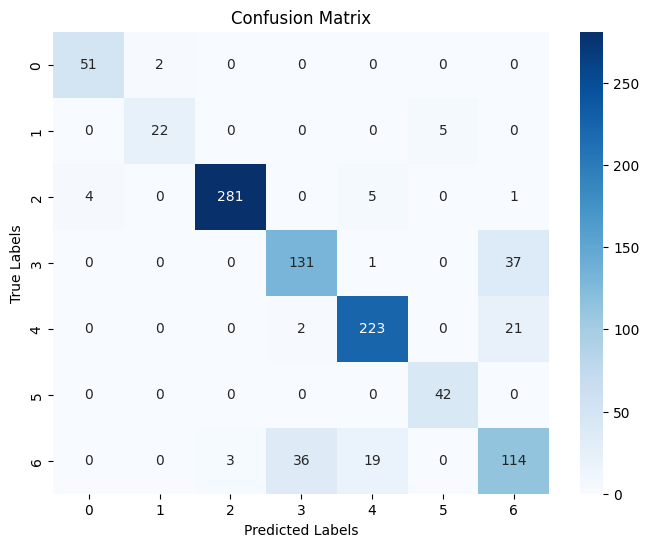

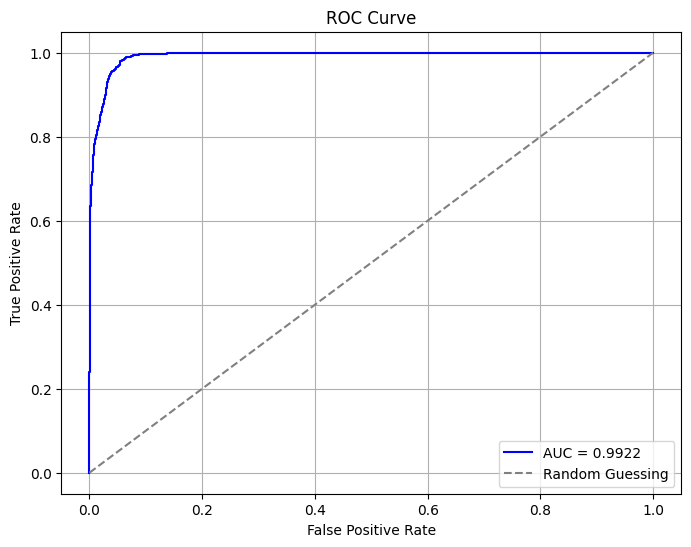

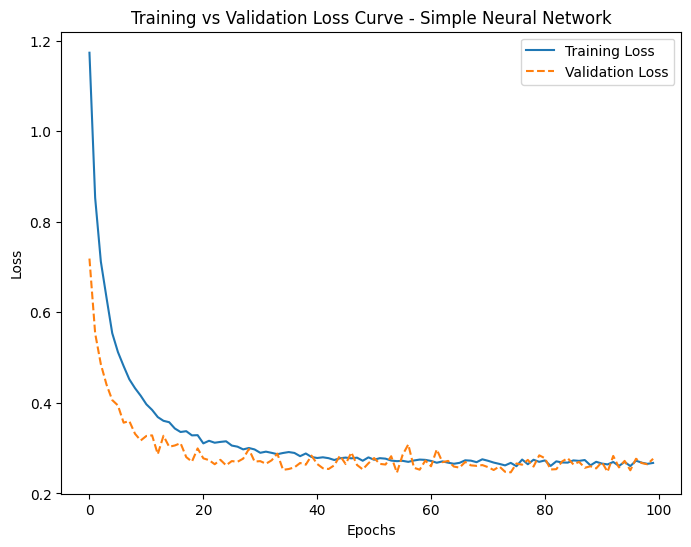

In [9]:
# Defining the Simple Neural Network
simple_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(7, activation='softmax')  # Updated for 7 output classes
])

# Compiling the model
simple_nn.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = simple_nn.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Save Simple Neural Network (SNN)
saved_models_dir = "/content/saved_models"
os.makedirs(saved_models_dir, exist_ok=True)
simple_nn.save(os.path.join(saved_models_dir, "simple_nn_model.h5"))

# Evaluating the model
y_pred_probs = simple_nn.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
# Change here to extract the true class labels from the one-hot encoded y_test
y_true = np.argmax(y_test, axis=1)

# Computing evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Computing ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_probs.ravel())
auc_score = auc(fpr, tpr)

# Printing results
print(f"\n Simple Neural Network results:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  AUC Score: {auc_score:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Training vs Validation Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Curve - Simple Neural Network")
plt.legend()
plt.show()


**THE LOGISTIC REGRESSION MODEL**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


 Logistic Regression Results:
 Accuracy: 0.8330
 Precision: 0.8412
 Recall: 0.8330
 F1 Score: 0.8353
 AUC Score: 0.9837


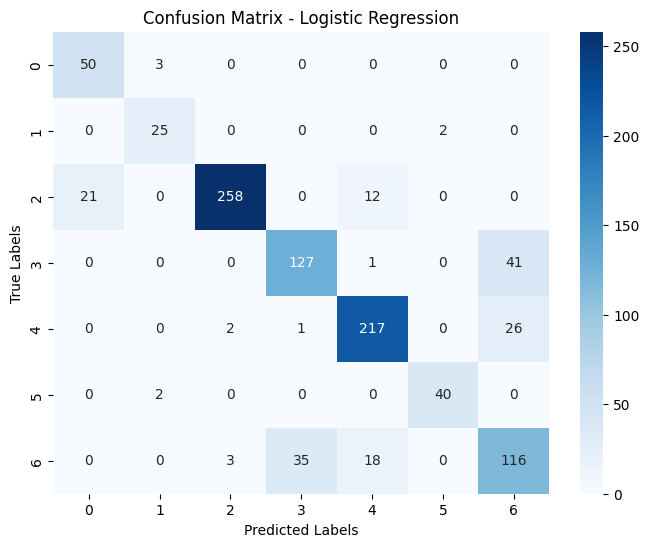


 total misclassified samples: 167


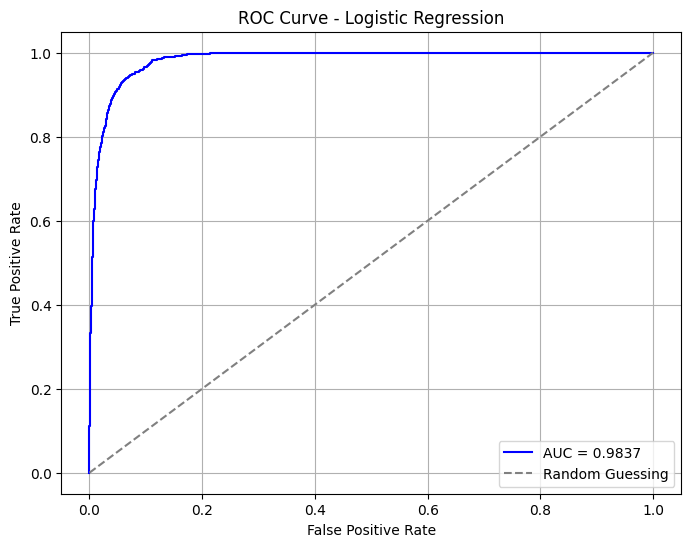


 Misclassified Samples:
  - Sample 2: True Label = 4, Predicted = 6
  - Sample 5: True Label = 3, Predicted = 6
  - Sample 13: True Label = 6, Predicted = 4
  - Sample 24: True Label = 4, Predicted = 2
  - Sample 49: True Label = 3, Predicted = 6


In [10]:
# Training the model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train_resampled, np.argmax(y_train_resampled, axis=1))

# Save Logistic Regression Model
joblib.dump(log_reg, os.path.join(saved_models_dir, "logistic_regression_model.pkl"))

# Evaluating the model

# Predicting on test set
y_pred_probs = log_reg.predict_proba(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Computing the evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_probs.ravel())
auc_score = auc(fpr, tpr)

# Printing results
print(f" Logistic Regression Results:")
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")
print(f" AUC Score: {auc_score:.4f}")

# The Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Printing the misclassified counts
misclassified = (y_true != y_pred_classes).sum()
print(f"\n total misclassified samples: {misclassified}")

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

#  Error analysis
error_indices = np.where(y_true != y_pred_classes)[0]
print("\n Misclassified Samples:")
for i in error_indices[:5]:
    print(f"  - Sample {i}: True Label = {y_true[i]}, Predicted = {y_pred_classes[i]}")

**ADAM OPTIMIZER WITH L2**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3608 - loss: 1.9578 - val_accuracy: 0.6760 - val_loss: 1.1673
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6190 - loss: 1.1439 - val_accuracy: 0.8060 - val_loss: 0.7453
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6618 - loss: 1.0258 - val_accuracy: 0.8100 - val_loss: 0.6823
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6950 - loss: 0.9403 - val_accuracy: 0.8360 - val_loss: 0.6362
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7071 - loss: 0.8793 - val_accuracy: 0.8410 - val_loss: 0.6031
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7487 - loss: 0.8235 - val_accuracy: 0.8450 - val_loss: 0.5868
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7339 - loss: 0.8198 - val_accuracy: 0.8500 - val_loss: 0.5593
Epoch 8/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7511 - loss: 0.7748 - val_accuracy: 0.8470

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 Adam optimizer model results:
 Accuracy: 0.8660
 Precision: 0.8686
 Recall: 0.8660
 F1 Score: 0.8670
 AUC Score: 0.9928


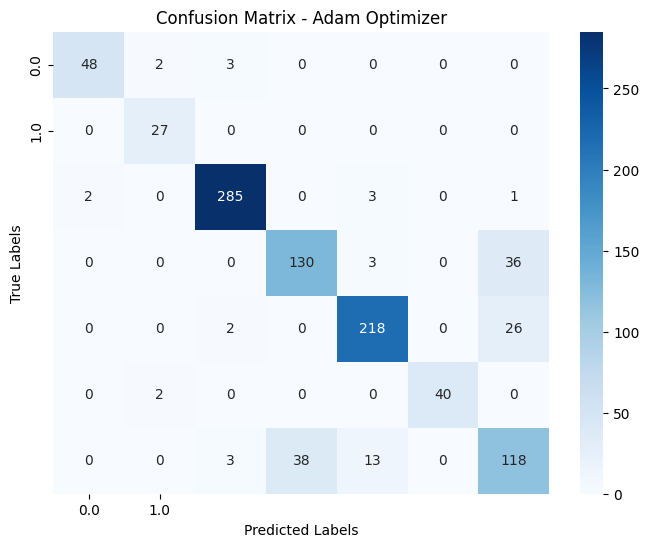

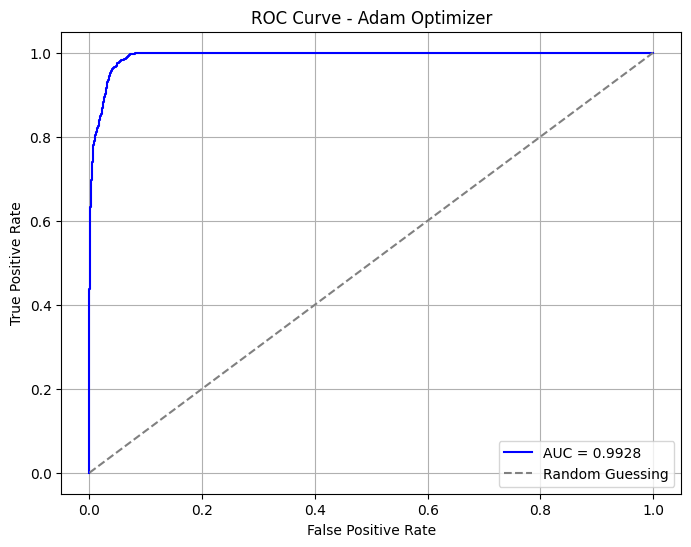

In [11]:
from tensorflow.keras.callbacks import EarlyStopping # Importing the EarlyStopping class
from tensorflow.keras.layers import BatchNormalization
# Defining the model
adam_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

# Compiling the model
adam_model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history_adam = adam_model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32,
                              validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Save Adam Optimizer Model
adam_model.save(os.path.join(saved_models_dir, "adam_model.h5"))

# Evaluating the model

# Predicting on the test set
y_pred_probs = adam_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
# Extract the true class labels from the one-hot encoded y_test
y_true = np.argmax(y_test, axis=1)

# Computing the evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Computing ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_probs.ravel())  # Use ravel to flatten arrays
auc_score = auc(fpr, tpr)

# Printing results
print(f"\n Adam optimizer model results:")
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")
print(f" AUC Score: {auc_score:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Adam Optimizer")
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Adam Optimizer")
plt.legend()
plt.grid(True)
plt.show()



**RMSprop OPTMIZER**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4096 - loss: 1.8510 - val_accuracy: 0.6480 - val_loss: 1.2151
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6314 - loss: 1.1209 - val_accuracy: 0.8130 - val_loss: 0.7475
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6867 - loss: 0.9730 - val_accuracy: 0.8330 - val_loss: 0.6537
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7128 - loss: 0.8934 - val_accuracy: 0.8610 - val_loss: 0.5792
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7279 - loss: 0.8361 - val_accuracy: 0.8380 - val_loss: 0.5654
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7349 - loss: 0.8136 - val_accuracy: 0.8590 - val_loss: 0.5300
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7564 - loss: 0.7637 - val_accuracy: 0.8200 - val_loss: 0.5656
Epoch 8/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7719 - loss: 0.7210 - val_accuracy: 0.8710

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

 RMSprop Optimizer Model Results:
   Accuracy: 0.8710
   Precision: 0.8674
   Recall: 0.8710
   F1 Score: 0.8680


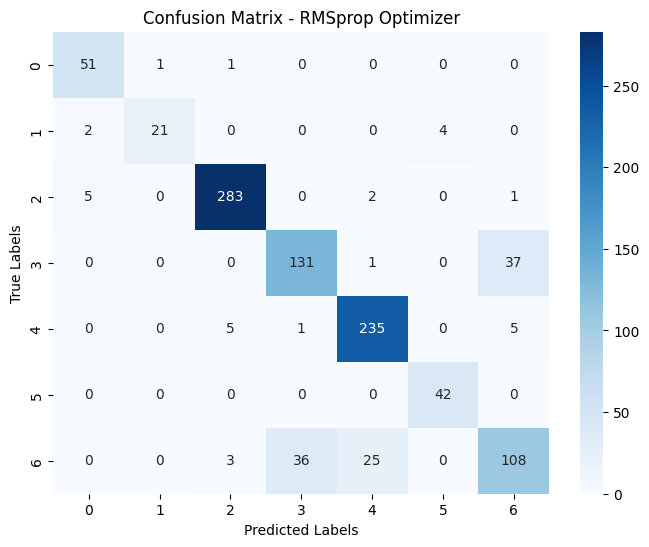

In [12]:
# Defining Neural Network Model with RMSprop Optimizer
rmsprop_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(7, activation='softmax')  # Updated to 7 output neurons for all BMI categories
])

# Compiling the model
rmsprop_model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the Model
history_rmsprop = rmsprop_model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32,
                              validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Save RMSprop Optimizer Model
rmsprop_model.save(os.path.join(saved_models_dir, "rmsprop_model.h5"))

# Model Evaluation

# Predict on test set
y_pred_probs = rmsprop_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Extract true class labels from one-hot encoded y_test
y_true = np.argmax(y_test, axis=1)

# Computing the evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')


# Printing results
print(f"\n RMSprop Optimizer Model Results:")
print(f"   Accuracy: {accuracy:.4f}")
print(f"   Precision: {precision:.4f}")
print(f"   Recall: {recall:.4f}")
print(f"   F1 Score: {f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - RMSprop Optimizer")
plt.show()


**SGD + MOMENTUM OPTIMIZER**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3348 - loss: 2.1183 - val_accuracy: 0.5740 - val_loss: 1.4511
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5545 - loss: 1.3290 - val_accuracy: 0.7850 - val_loss: 0.8751
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6129 - loss: 1.1603 - val_accuracy: 0.8170 - val_loss: 0.7730
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6386 - loss: 1.0881 - val_accuracy: 0.8270 - val_loss: 0.7367
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6465 - loss: 1.0633 - val_accuracy: 0.8310 - val_loss: 0.7148
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6760 - loss: 1.0164 - val_accuracy: 0.8300 - val_loss: 0.6974
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6898 - loss: 0.9775 - val_accuracy: 0.8380 - val_loss: 0.6764
Epoch 8/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6958 - loss: 0.9352 - val_accuracy: 0.8360

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 SGD + Momentum Optimizer Model Results:
   Accuracy: 0.8750
   Precision: 0.8795
   Recall: 0.8750
   F1 Score: 0.8766


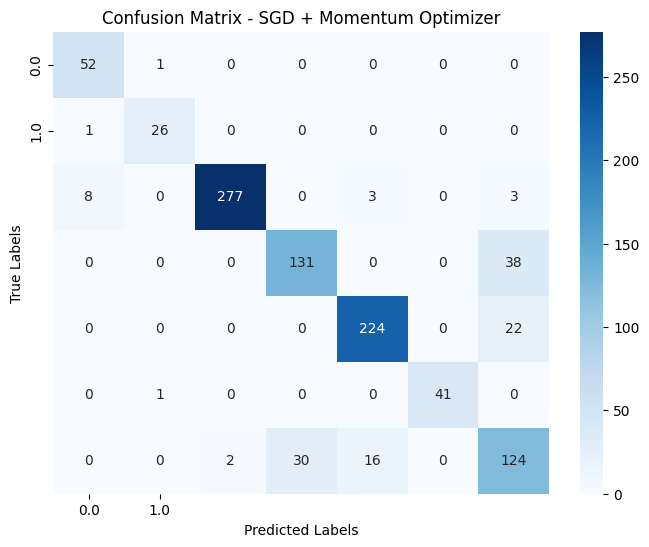

In [13]:
# Defining the Neural Network Model with SGD + Momentum Optimizer
sgd_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

# Compiling the Model
sgd_model.compile(optimizer=SGD(learning_rate=0.0005, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the Model
history_sgd = sgd_model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32,
                              validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Save SGD + Momentum Optimizer Model
sgd_model.save(os.path.join(saved_models_dir, "sgd_momentum_model.h5"))

# Model Evaluation

# Predict on test set
y_pred_probs = sgd_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get true class labels from one-hot encoded y_test
y_true = np.argmax(y_test, axis=1)

# Computing evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Printing results
print(f"\n SGD + Momentum Optimizer Model Results:")
print(f"   Accuracy: {accuracy:.4f}")
print(f"   Precision: {precision:.4f}")
print(f"   Recall: {recall:.4f}")
print(f"   F1 Score: {f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SGD + Momentum Optimizer")
plt.show()

